## export dim.reductions from integrated multiome objects (RNA and ATAC)

- Last updated: 8/14/2024
- Author: Yang-Joon Kim

- input: integrated_RNA/ATAC.RDS objects

- output: .csv files for "integrated_pca", "integrated_lsi", etc.
- adding "wsnn" for weighted (shared) nearest neighbors for AlignedUMAP

In [1]:
library(Seurat)
library(Signac)
library(dplyr)
library(tidyr)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(Matrix)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /usr/lib64/libopenblas-r0.3.15.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Matrix_1.6-3       patchwork_1.1.3    ggplot2_3.4.4      SeuratData_0.2.2  
[5] tidyr_1.3.0        dplyr_1.1.4        Signac_1.11.0      SeuratObject_4.1.4
[9] Seurat_4.4.0      

loaded via a namespace (and not attached):
  [1] RColo

In [2]:
# import the Seurat object for all assays, integrated over timepoints, datasets
multiome <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_wnn_gene_activity_3d_umaps.rds")
multiome

An object of class Seurat 
726063 features across 95196 samples within 5 assays 
Active assay: peaks_integrated (640834 features, 0 variable features)
 4 other assays present: RNA, SCT, integrated, Gene.Activity
 9 dimensional reductions calculated: integrated_lsi, umap, integrated_pca, umap.rna, umap.atac, wnn.umap, umap.rna.3D, umap.atac.3D, wnn.umap.3D

## WNN (weighted nearest neighbors - for joint RNA and ATAC)

- This one used weights to compute the nearest 

In [6]:
# extract the WSNN (weighted nearest neighbor graph) and save it as a sparse matrix
wsnn <- multiome@graphs$wsnn

# save the sparse matrix in MatrixMarket format
writeMM(wsnn, file = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse.csv")

# write row and column names 
#write.csv(rownames(wsnn), file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse_rows.csv", row.names=False)
#write.csv(colnames(wsnn), file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse_cols.csv", row.names=False)

NULL

In [12]:
# wnn.weight <- FindModalityWeights(multiome, 
#                                   reduction.list = list("integrated_pca", "integrated_lsi"),
#                                   dims.list = list(1:40, 2:50))

ERROR: Error in FindModalityWeights(multiome, reduction.list = list("integrated_pca", : could not find function "FindModalityWeights"


In [25]:
multiome@commands$FindMultiModalNeighbors@params

$reduction.list
$reduction.list[[1]]
[1] "integrated_pca"

$reduction.list[[2]]
[1] "integrated_lsi"


$dims.list
$dims.list[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

$dims.list[[2]]
 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40


$k.nn
[1] 20

$l2.norm
[1] TRUE

$knn.graph.name
[1] "wknn"

$snn.graph.name
[1] "wsnn"

$weighted.nn.name
[1] "weighted.nn.3d"

$modality.weight.name
[1] "integrated.weight"       "peaks_integrated.weight"

$knn.range
[1] 200

$prune.SNN
[1] 0.06666667

$sd.scale
[1] 1

$cross.contant.list
$cross.contant.list[[1]]
[1] 1e-04

$cross.contant.list[[2]]
[1] 1e-04


$smooth
[1] FALSE

$return.intermediate
[1] FALSE

$verbose
[1] TRUE

In [27]:
write.csv(multiome@meta.data$SCT.weight, file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/RNA_weights.csv")


In [ ]:
multiome@meta.data$SCT.weight

In [ ]:
metadata = pbmc@meta.data
WNN_weights = subset(x=metadata, select = c(SCT.weight, ATAC.weight))
WNN_weights

In [21]:
multiome@meta.data$

## RNA and ATAC
- RNA - "integrated" assay for "integrated_pca"
- ATAC - "integrated_peaks" assay for "integrated_lsi"

In [8]:
DefaultAssay(multiome) <- "integrated"

In [34]:
# check the dim.reduction (cells-by-LSI)
head(Embeddings(multiome, reduction = "integrated_lsi")[, 1:5])

,integratedlsi_1,integratedlsi_2,integratedlsi_3,integratedlsi_4,integratedlsi_5
AAACAGCCACCTAAGC-1_1,-0.1585408,-0.8592147,2.3830877,0.95910692,2.6668975
AAACAGCCAGGGAGGA-1_1,0.2744693,-0.8045019,0.1457220,-0.40630786,0.4757066
AAACAGCCATAGACCC-1_1,-1.2778468,1.4249703,-1.3407873,-0.91740432,1.7696958
AAACATGCAAACTCAT-1_1,-0.2362890,0.1040443,-1.1288345,1.33431880,0.8304248
AAACATGCAAGGACCA-1_1,1.2333758,1.0666617,-0.3294287,-0.05217505,-0.1279303
AAACATGCAAGGATTA-1_1,-0.2588374,1.3072723,-0.4028124,-0.42638643,1.0286985


In [39]:
head(Embeddings(multiome, reduction = "integrated_lsi")[, 2:40])

,integratedlsi_2,integratedlsi_3,integratedlsi_4,integratedlsi_5,integratedlsi_6,integratedlsi_7,integratedlsi_8,integratedlsi_9,integratedlsi_10,integratedlsi_11,⋯,integratedlsi_31,integratedlsi_32,integratedlsi_33,integratedlsi_34,integratedlsi_35,integratedlsi_36,integratedlsi_37,integratedlsi_38,integratedlsi_39,integratedlsi_40
AAACAGCCACCTAAGC-1_1,-0.8592147,2.3830877,0.95910692,2.6668975,-1.6997294,1.35389055,-1.15188935,-0.35614550,0.1174583,-0.1455225,⋯,0.7557465,-1.1306412,0.3555405,2.2656292,2.20669005,-1.7476864,0.3602746,1.80861666,-1.5966218,0.11749138
AAACAGCCAGGGAGGA-1_1,-0.8045019,0.1457220,-0.40630786,0.4757066,1.0477705,-0.07465759,-0.75576650,-0.03567370,1.4299138,1.3914153,⋯,1.0153108,-0.8464187,-2.1605625,-1.2137536,-0.09625242,0.8208039,0.7902695,0.58078152,0.1364206,1.81677489
AAACAGCCATAGACCC-1_1,1.4249703,-1.3407873,-0.91740432,1.7696958,0.6367484,0.63465858,-0.71275065,-0.58203337,-1.4825443,-1.1969416,⋯,0.7789912,-0.2131080,0.5836853,1.7242134,-0.86320383,-2.6510958,-1.4600482,-5.77305768,0.9538654,-1.79547586
AAACATGCAAACTCAT-1_1,0.1040443,-1.1288345,1.33431880,0.8304248,1.5170926,0.12404144,0.97247896,-0.61005931,0.3553540,0.9231703,⋯,0.2869309,-1.4946188,0.8289319,1.5532573,-0.69517321,1.5298806,-0.1788910,-1.05211690,0.3103341,0.28854481
AAACATGCAAGGACCA-1_1,1.0666617,-0.3294287,-0.05217505,-0.1279303,-0.3668745,0.68477463,-0.88854347,-0.04972769,0.2968172,0.1010264,⋯,-0.6930031,0.5560855,0.7349432,0.7001480,-0.30986174,0.7237106,0.2738835,-0.00196232,-0.3598103,-0.01829744
AAACATGCAAGGATTA-1_1,1.3072723,-0.4028124,-0.42638643,1.0286985,0.8452178,0.57633210,-0.08435149,-0.01984362,-0.9585357,-0.7805269,⋯,0.6504591,-0.2481538,0.7596405,-0.0849345,0.76171892,-0.2337896,0.8274849,0.02361562,0.8989724,0.48255465


In [52]:
# extract the 'integrated_lsi' (cells-by-LSI) as a dataframe as export as a csv file
# NOTE that we'll export all LSI components, but the first one should not be used (as the first LSI component is correlated with seq depth)
df_integrated_lsi <- Embeddings(multiome, reduction = "integrated_lsi")
write.csv(df_integrated_lsi, file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_lsi.csv")

In [41]:
# check the dim.reduction (cells-by-PCs)
head(Embeddings(multiome, reduction = "integrated_pca"))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100
AAACAGCCACCTAAGC-1_1,2.337219,-1.429061,-5.8632044,2.233877,7.2562897524,2.17464599,2.64428774,-0.2685757,1.1169619,-1.5406136,⋯,-2.4238182,0.7463831,2.3489134,0.5996667,0.2682301,0.03763932,1.0935974,2.2924986,-2.18090161,-0.6095044
AAACAGCCAGGGAGGA-1_1,5.925528,-4.112149,-3.7459730,-2.587663,-0.8245255832,-0.77018075,-0.62957452,-2.4312286,-0.5776614,-2.2899818,⋯,-0.5968996,-0.5808065,-0.1512732,-2.5793585,0.4845551,4.24438369,1.2657821,1.0419330,-0.79071352,1.4590411
AAACAGCCATAGACCC-1_1,3.573711,6.779139,-1.3351922,-7.599583,3.3839136493,-2.22162322,-0.41090202,2.5746016,2.4948918,1.4340720,⋯,-1.3691898,-1.0727930,0.7296609,-2.3830126,-2.4627147,0.82952095,-1.4478324,-1.0371053,-0.01978965,-0.1194382
AAACATGCAAACTCAT-1_1,-2.198315,-2.919139,4.4607792,-3.449388,0.9424428720,2.30514613,-0.60915026,-0.3843357,3.2045181,-2.1204701,⋯,-2.7449783,0.2717589,0.3681338,0.6542988,0.6984634,3.07510645,-1.2065390,-0.5044732,-1.48357078,0.2751041
AAACATGCAAGGACCA-1_1,-6.611312,4.038513,-0.6994662,2.057417,-0.5307050566,-0.07489751,0.74618722,-0.6920774,-0.8323652,0.8856151,⋯,-0.1520701,0.2808146,0.1646928,0.9467659,-0.8446135,0.02381110,0.5888540,0.4072692,0.39421214,0.3137710
AAACATGCAAGGATTA-1_1,-1.559648,-4.434774,5.6487287,-1.353118,-0.0009793814,0.72055653,0.05634376,-0.4779616,-0.5271167,1.3283696,⋯,0.2257822,-1.1042500,-1.2374558,-0.5011483,0.1146345,0.11903836,-0.8073365,1.5460119,-1.45485575,-2.1772908


In [43]:
# extract the 'integrated_lsi' (cells-by-LSI) as a dataframe as export as a csv file
# NOTE that we'll export only the 2:40 LSIs (used for computing UMAP)
df_integrated_pca <- Embeddings(multiome, reduction = "integrated_pca")
write.csv(df_integrated_pca, file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_pca.csv")

## export metadata

In [45]:
multiome@meta.data %>% head

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,nCount_SCT,⋯,nCount_Gene.Activity,nFeature_Gene.Activity,nCount_peaks_integrated,nFeature_peaks_integrated,dataset,prediction.score.Germline,integrated.weight,peaks_integrated.weight,wsnn_res.0.8,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACAGCCACCTAAGC-1_1,SeuratProject,6522,2317,21425,9781,0.5719844,0.40,4.488213,0.48,5661,⋯,12380,7106,13987,11974,TDR118,NA,4.062589e-01,0.5937411,10,10
AAACAGCCAGGGAGGA-1_1,SeuratProject,6100,2319,10334,5028,0.4481434,0.13,4.795205,0.75,5553,⋯,6192,4256,6889,6302,TDR118,NA,7.616462e-01,0.2383538,16,16
AAACAGCCATAGACCC-1_1,SeuratProject,12581,3467,51485,19874,0.5142133,0.24,5.238692,0.92,5781,⋯,26083,10345,32040,23386,TDR118,NA,5.938950e-08,0.9999999,14,14
AAACATGCAAACTCAT-1_1,SeuratProject,5642,2145,19812,9183,0.6733186,0.85,4.409525,0.41,5363,⋯,11748,6534,13090,11254,TDR118,NA,3.694048e-01,0.6305952,0,0
AAACATGCAAGGACCA-1_1,SeuratProject,2691,838,5182,2565,0.3949045,0.06,4.939061,0.83,4727,⋯,3061,2376,3390,3149,TDR118,NA,3.265597e-02,0.9673440,3,3
AAACATGCAAGGATTA-1_1,SeuratProject,4233,1703,24072,10949,0.6424510,0.72,4.636479,0.62,4729,⋯,13152,7376,15383,13086,TDR118,NA,5.023156e-01,0.4976844,4,4


In [46]:
multiome$dataset %>% unique 

[1] "TDR118" "TDR119" "TDR124" "TDR125" "TDR126" "TDR127" "TDR128"

In [49]:
# Define a mapping from dataset identifiers to timepoints
timepoint_mapping <- c("TDR126" = "0somites", 
                       "TDR127" = "5somite", 
                       "TDR128" = "10somites",
                       "TDR118" = "15somites",
                       "TDR119" = "15somites",
                       "TDR125" = "20somites",
                       "TDR124" = "30somites"
                       )

# Apply the mapping to the dataset column to create a new timepoint column
multiome$timepoint <- timepoint_mapping[multiome$dataset]


In [51]:
# export metadata as a csv file
df_metadata <- multiome@meta.data
write.csv(df_metadata, file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/metadata.csv")

In [ ]:
# Find neighbors based on the RNA assay
multiome <- FindNeighbors(multiome, reduction = "pca", assay = "RNA", graph.name = "rna.nn")

In [54]:
# compute the neighbors for both RNA("integrated") and ATAC("peaks_integrated") assays

# First, "integrated" for RNA modality
DefaultAssay(multiome) <- "integrated"
multiome <- FindNeighbors(multiome, reduction = "integrated_pca", dims=1:30, 
                          assay = "integrated", graph.name=c("rna.nn","rna.nn"))

# Next, "peaks_integrated" for ATAC modality
DefaultAssay(multiome) <- "peaks_integrated"
multiome <- FindNeighbors(multiome, reduction = "integrated_lsi", dims = 2:40, 
                          assay = "peaks_integrated", graph.name=c("atac.nn","atac.nn"))

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [53]:
multiome@neighbors

$weighted.nn
A Neighbor object containing the 20 nearest neighbors for 95196 cells

In [28]:
Neighbors(multiome)

[1] "weighted.nn"

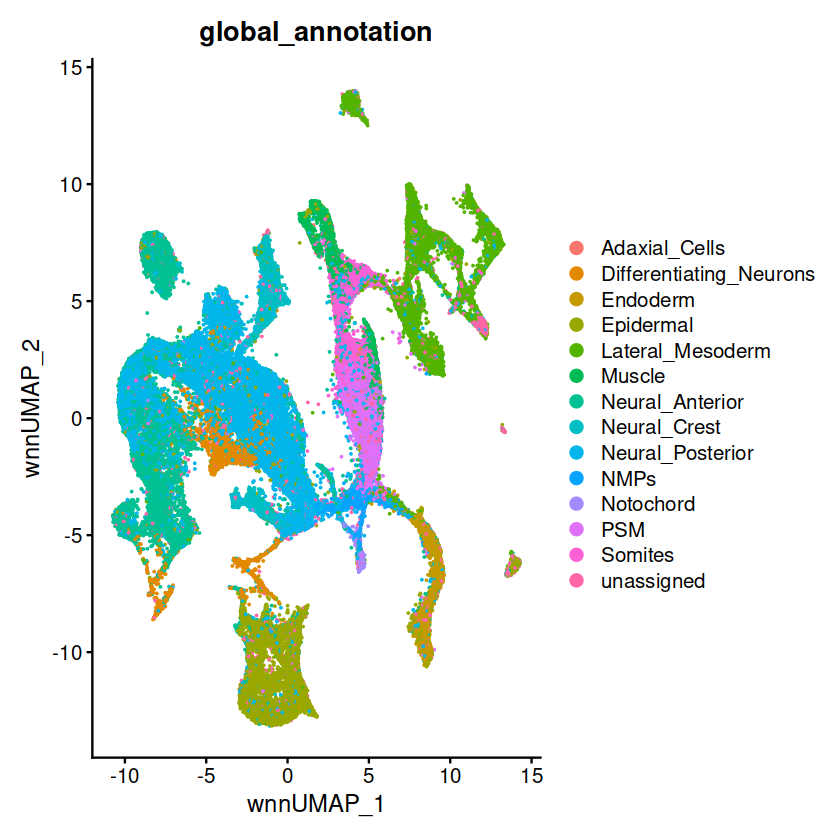

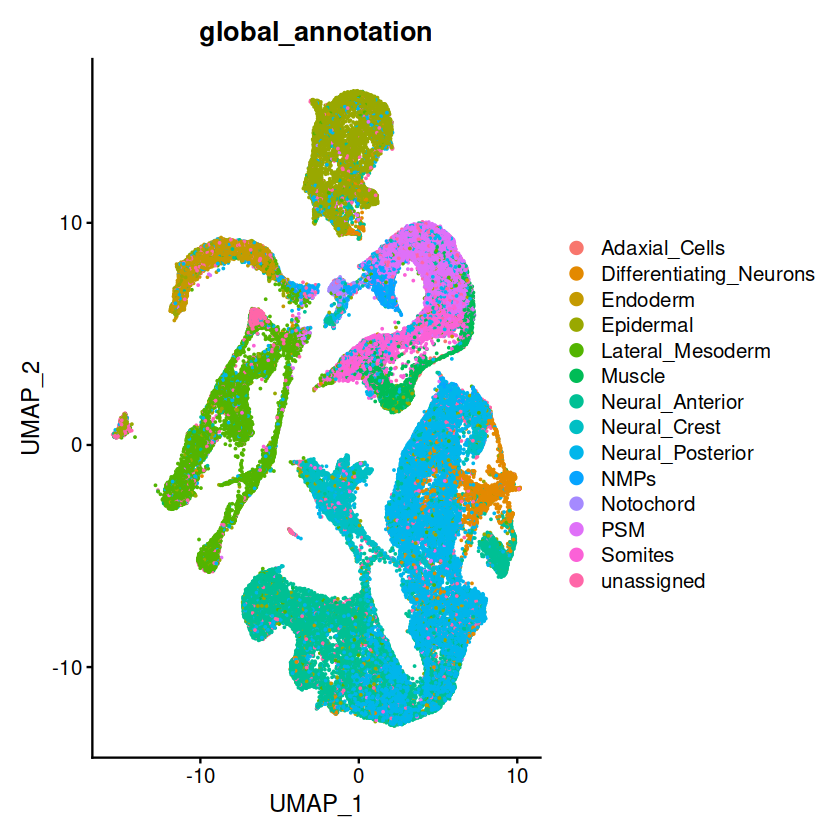

In [19]:
p1 <- DimPlot(multiome, reduction = "wnn.umap", group.by="global_annotation")
p2 <- DimPlot(multiome, reduction = "umap.atac", group.by="global_annotation")
p1
p2

In [ ]:
## 

## WSNN (weighted shared nearest neighbors)

In [13]:
multiome@neighbors$weighted.nn

A Neighbor object containing the 20 nearest neighbors for 95196 cells

In [4]:
multiome@graphs$wsnn %>% head

  [[ suppressing 34 column names ‘AAACAGCCACCTAAGC-1_1’, ‘AAACAGCCAGGGAGGA-1_1’, ‘AAACAGCCATAGACCC-1_1’ ... ]]



6 x 95196 sparse Matrix of class "dgCMatrix"
                                                                              
AAACAGCCACCTAAGC-1_1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AAACAGCCAGGGAGGA-1_1 . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . .
AAACAGCCATAGACCC-1_1 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . .
AAACATGCAAACTCAT-1_1 . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . .
AAACATGCAAGGACCA-1_1 . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . .
AAACATGCAAGGATTA-1_1 . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . .
                                     
AAACAGCCACCTAAGC-1_1 . . . . . ......
AAACAGCCAGGGAGGA-1_1 . . . . . ......
AAACAGCCATAGACCC-1_1 . . . . . ......
AAACATGCAAACTCAT-1_1 . . . . . ......
AAACATGCAAGGACCA-1_1 . . . . . ......
AAACATGCAAGGATTA-1_1 . . . . . ......

 .....suppressing 95162 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [14]:
# Extract the weighted nearest neighbor graph
wsnn <- multiome@graphs$wsnn

# Convert the sparse matrix to a dense matrix
wsnn_dense <- as.matrix(wsnn)

# Save the WNN matrix as a CSV file
write.csv(wsnn_dense, file = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_matrix.csv", row.names = TRUE)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 67.5 GiB”


In [19]:
# Extract the weighted nearest neighbor object (Neighbor class)
nn_idx <- multiome@neighbors$weighted.nn@nn.idx
nn_dist <- multiome@neighbors$weighted.nn@nn.dist
nn_idx <- multiome@neighbors$weighted.nn@nn.idx
cell_names <- multiome@neighbors$weighted.nn@cell.names

In [20]:
# Create a data frame to organize nearest neighbor indices and distances
# Assume nn_idx and nn_dist are matrices with the same dimensions where rows correspond to cells
# and columns correspond to the rank of neighbors (1st nearest, 2nd nearest, etc.)

# Expand the nearest neighbor indices and distances into long format
nn_data <- expand.grid(cell_id = 1:nrow(nn_idx), neighbor_rank = 1:ncol(nn_idx))
nn_data$cell_name = cell_names[nn_data$cell_id]
nn_data$neighbor_name = cell_names[nn_idx[cbind(nn_data$cell_id, nn_data$neighbor_rank)]]
nn_data$distance = nn_dist[cbind(nn_data$cell_id, nn_data$neighbor_rank)]

In [21]:
nn_data %>% head()

,cell_id,neighbor_rank,cell_name,neighbor_name,distance
,<int>,<int>,<chr>,<chr>,<dbl>
1,1,1,AAACAGCCACCTAAGC-1_1,CACGCTAAGCGCCTTT-1_4,0.1709780672
2,2,1,AAACAGCCAGGGAGGA-1_1,GGTTTCTGTATGGTGC-1_1,0.2270396452
3,3,1,AAACAGCCATAGACCC-1_1,GCAGGCTTCGGGATTT-1_1,0.0001807635
4,4,1,AAACATGCAAACTCAT-1_1,ACAACAACAATCTCTC-1_6,0.2715965121
5,5,1,AAACATGCAAGGACCA-1_1,TCCTCAATCACCGGTA-1_1,0.1065851946
6,6,1,AAACATGCAAGGATTA-1_1,GCTAACAGTTAGGACC-1_1,0.3660507047


In [24]:
length(nn_data$cell_id)

[1] 1903920

In [22]:
# Save to CSV
write.csv(nn_data, "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wnn.csv", row.names = FALSE)

In [15]:
Neighbors(multiome, slot = "weighted.nn")

A Neighbor object containing the 20 nearest neighbors for 95196 cells

## export the WNN for nearest neighborhood (connectivities) matrix for adata

- 



In [3]:
# as an example, we'll load one dataset (one timepoint)
multiome <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/TDR126/TDR126_processed.RDS")
multiome

An object of class Seurat 
1665222 features across 15036 samples within 7 assays 
Active assay: peaks_merged (491782 features, 491782 variable features)
 6 other assays present: RNA, ATAC, SCT, peaks_bulk, peaks_celltype, Gene.Activity
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [11]:
multiome@reductions$lsi

LSI_ 1 
Positive:  MT-22-3567, MT-13392-16501, 10-73877-77382, 14-31564961-31567510, 8-26866652-26869137, 16-11150437-11152550, 12-22559493-22560541, 7-21721058-21723996, 4-19583-21407, 25-6389127-6391445 
	   7-33683238-33686169, 13-224680-228328, 2-21746168-21747761, 7-41468008-41469453, 17-11417366-11419312, 9-21458576-21461406, 25-234022-236857, 7-24993773-24996536, 3-32423490-32426787, 23-9862836-9864080 
Negative:  4-66579156-66579355, 19-6787000-6787201, 1-14596045-14596283, 3-53997862-53998086, 3-37470780-37470979, 8-12797329-12797762, 15-19175788-19175987, 21-32546243-32546451, 7-10605548-10605747, 9-53835282-53835496 
	   14-51958561-51958769, 17-47749259-47749458, 12-20971929-20972134, 2-34814196-34814395, 17-39314527-39314726, 1-32321807-32322013, 20-6266834-6267033, 14-47287733-47287978, 23-14000805-14001004, 18-37977027-37977226 
LSI_ 2 
Positive:  13-5761797-5762801, 5-17363867-17365053, 17-24349820-24351316, 21-15960734-15962005, 3-25721712-25722666, 24-27633501-2763545

In [8]:
# extract the weighted nearest neighbors (wsnn)
# NOTE that Seurat uses Jaccard similarity index to compute this nearest neighborhoods, 
# and this case, we used weighted nearest neighborhoods between RNA (PC) and ATAC(LSI)
wsnn <- multiome@graphs$wsnn

## WNN (weighted nearest neighbors - for joint RNA and ATAC)

- This one used weights to compute the nearest 

In [6]:
# extract the WSNN (weighted nearest neighbor graph) and save it as a sparse matrix
wsnn <- multiome@graphs$wsnn

# save the sparse matrix in MatrixMarket format
writeMM(wsnn, file = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse.csv")

# write row and column names
#write.csv(rownames(wsnn), file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse_rows.csv", row.names=False)
#write.csv(colnames(wsnn), file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/wsnn_sparse_cols.csv", row.names=False)

NULL

In [12]:
# wnn.weight <- FindModalityWeights(multiome, 
#                                   reduction.list = list("integrated_pca", "integrated_lsi"),
#                                   dims.list = list(1:40, 2:50))

ERROR: Error in FindModalityWeights(multiome, reduction.list = list("integrated_pca", : could not find function "FindModalityWeights"


In [25]:
multiome@commands$FindMultiModalNeighbors@params

$reduction.list
$reduction.list[[1]]
[1] "integrated_pca"

$reduction.list[[2]]
[1] "integrated_lsi"


$dims.list
$dims.list[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

$dims.list[[2]]
 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40


$k.nn
[1] 20

$l2.norm
[1] TRUE

$knn.graph.name
[1] "wknn"

$snn.graph.name
[1] "wsnn"

$weighted.nn.name
[1] "weighted.nn.3d"

$modality.weight.name
[1] "integrated.weight"       "peaks_integrated.weight"

$knn.range
[1] 200

$prune.SNN
[1] 0.06666667

$sd.scale
[1] 1

$cross.contant.list
$cross.contant.list[[1]]
[1] 1e-04

$cross.contant.list[[2]]
[1] 1e-04


$smooth
[1] FALSE

$return.intermediate
[1] FALSE

$verbose
[1] TRUE

In [27]:
write.csv(multiome@meta.data$SCT.weight, file="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/RNA_weights.csv")


In [ ]:
multiome@meta.data$SCT.weight

In [ ]:
metadata = pbmc@meta.data
WNN_weights = subset(x=metadata, select = c(SCT.weight, ATAC.weight))
WNN_weights

In [21]:
multiome@meta.data$